In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
%matplotlib inline

[download data](http://archive.ics.uci.edu/ml/machine-learning-databases/00294/),共五部分数据。

In [2]:
pp_data = pd.read_csv('folds_pp.csv')

In [3]:
pp_data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
pp_data.shape

(9568, 5)

In [5]:
pp_data1 = pd.read_csv('folds_pp1.csv')

In [6]:
pp_data1.shape

(9568, 5)

In [7]:
pp_data2 = pd.read_csv('folds_pp2.csv')
pp_data3 = pd.read_csv('folds_pp3.csv')
pp_data4 = pd.read_csv('folds_pp4.csv')

In [8]:
# axis=0为纵向拼接,axis=1为横向拼接
# 纵向：concat([df1,df2]) 等价于 df1.append(df2)
# 横向：concat([df1,df2],axis=1) 等价于 merge(df1,df2,left_index=True,right_index=True,how='outer')

pp_new = pd.concat([pp_data, pp_data1, pp_data2, pp_data3, pp_data4], axis=0 ,ignore_index = True)
pp_new.shape

(47840, 5)

AT（温度）, V（压力）, AP（湿度）, RH（压强）, PE（输出电力)。
本次目的是得到一个线性回归模型，即: `PE=θ_0+θ_1*AT+θ_2*V+θ_3*AP+θ_4*RH` 的线性关系，PE是样本输出，而AT/V/AP/RH这4个是样本特征，而需要学习的，就是θ_0、θ_1、θ_2、θ_3、θ_4这5个参数。


In [10]:
X = pp_new.drop('PE', axis=1)

In [11]:
Y = pp_new['PE']

In [13]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

scikit-learn的线性回归算法使用的是最小二乘法来实现的。

In [14]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print(linreg.intercept_) 
print(linreg.coef_)

453.694859258
[-1.97887108 -0.23112272  0.0628722  -0.15832456]


`PE = 453.694859258 - 1.97887108*AT - 0.23229086*V + 0.0628722*AP - 0.15832456*RH`

In [16]:
#模型拟合测试集
y_pred = linreg.predict(X_test)

from sklearn import metrics
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 20.2438203787
RMSE: 4.49931332302


In [17]:
# 对所有的样本做测试集
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, Y, cv=10)
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(Y, predicted))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(Y, predicted)))

MSE: 20.7707483486
RMSE: 4.55749364767


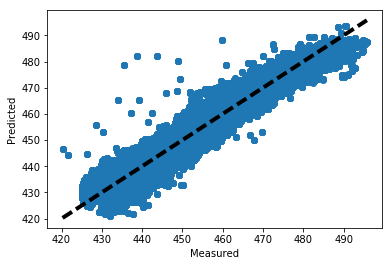

In [18]:
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()